In [1]:
from google.colab import drive
drive.mount('/colab')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /colab


In [0]:
import zipfile

local_zip = '/colab/My Drive/soccerball data/soccer_ball_data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/utkarsh/1')
zip_ref.close()

In [0]:
local_zip = '/colab/My Drive/soccerball data/yolo_custom-2300.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/utkarsh/2')
zip_ref.close()

In [0]:
# !cp -r "/utkarsh/1" "/colab/My Drive/yolo"
# !cp -r "/utkarsh/2" "/colab/My Drive/yolo"

In [0]:
import os

In [5]:
!pip install Cython
!git clone https://github.com/thtrieu/darkflow.git
os.chdir('darkflow')
!python3 setup.py build_ext --inplace
!pip install .

Cloning into 'darkflow'...
remote: Enumerating objects: 2706, done.
remote: Total 2706 (delta 0), reused 0 (delta 0), pack-reused 2706
Receiving objects: 100% (2706/2706), 18.74 MiB | 7.78 MiB/s, done.
Resolving deltas: 100% (1781/1781), done.
Compiling darkflow/cython_utils/nms.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo2_findboxes.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo_findboxes.pyx because it changed.
[1/3] Cythonizing darkflow/cython_utils/cy_yolo2_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo2_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/3] Cythonizing darkflow/cython_utils/cy_yolo_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level

### RUN THE CELLS TILL HERE.. RESTART RUNTIME BEFORE CONTINUING

In [0]:
import matplotlib.pyplot as plt
import numpy as np

from darkflow.net.build import TFNet
import cv2

In [9]:
import os
os.listdir('darkflow')

['__pycache__',
 'cli.py',
 '__init__.py',
 'version.py',
 'defaults.py',
 'utils',
 'cython_utils',
 'dark',
 'net']

In [0]:
!cp -r "/colab/My Drive/yolo/cfg" "./"

In [0]:
!cp -r "/colab/My Drive/yolo.weights" "./"

In [0]:
!mkdir utkarsh

In [0]:
!cp -r "/colab/My Drive/yolo/cfg" "./utkarsh"

In [26]:
os.listdir()

['sample_img',
 'LICENSE',
 'utkarsh',
 'build',
 'labels.txt',
 'cfg',
 'demo.gif',
 '.travis.yml',
 '.coveragerc',
 '.git',
 'darkflow',
 'yolo.weights',
 'test',
 'flow',
 'README.md',
 '.gitignore',
 'setup.py',
 'preview.png']

In [0]:
options = {"model": "utkarsh/cfg/yolo_custom.cfg", 
           "load": "/darkflow/yolo.weights",
           "batch": 2,
           "epoch": 50,
           "gpu": 1.0,
           "train": True,
           "annotation": "./annotations/",
           "dataset": "./images/"}

In [0]:
!mv labels.txt "/colab/My Drive/yolo"

In [0]:
!cp -r "/colab/My Drive/labels.txt" "./"

In [0]:
!cp -r "/colab/My Drive/yolo/1/annotations" "./"
!cp -r "/colab/My Drive/yolo/1/images" "./"

In [0]:
tfnet = TFNet(options)
tfnet.train()

In [45]:
original_img = cv2.imread("/colab/My Drive/2.37220627.jpg")
# print(original_img)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet.return_predict(original_img)
print(results)

[{'label': 'ball', 'confidence': 0.91222864, 'topleft': {'x': 252, 'y': 270}, 'bottomright': {'x': 292, 'y': 314}}, {'label': 'ball', 'confidence': 0.10864139, 'topleft': {'x': 271, 'y': 276}, 'bottomright': {'x': 315, 'y': 311}}]


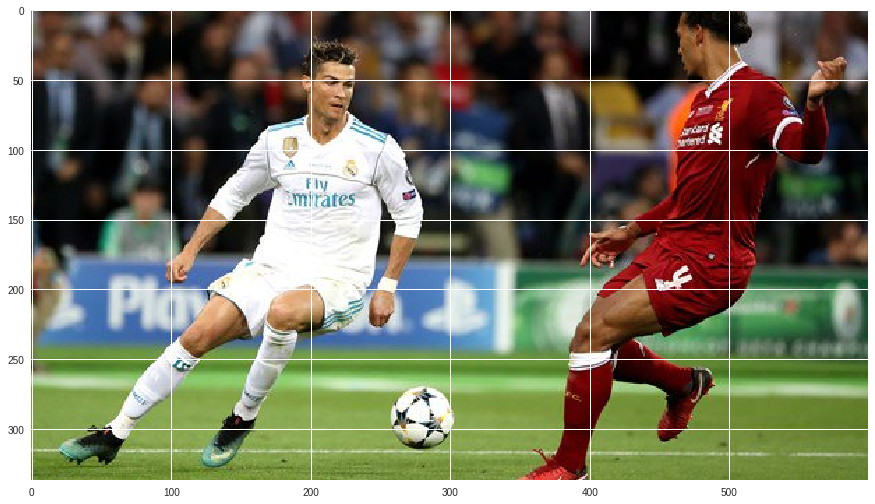

In [46]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)

In [0]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.3:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

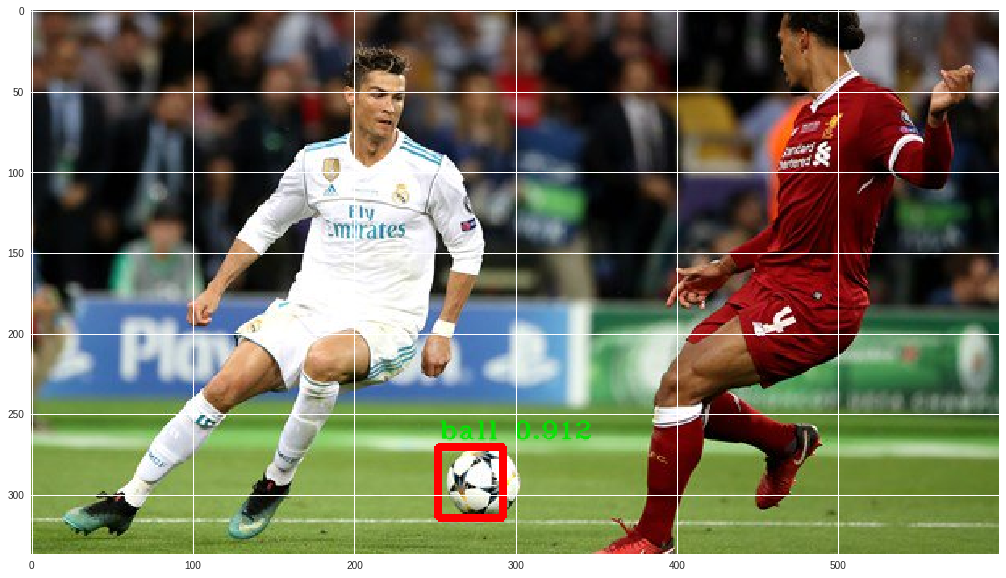

In [48]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))